<a href="https://colab.research.google.com/github/jakkamlavanya/awt-f/blob/main/ml_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# Load the dataset
file_path = "/content/drive/MyDrive/retail_customers.csv"  # Update this path if needed
df = pd.read_csv(file_path)

In [6]:
# Print the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Customer ID  Gender  Age  Annual Income  Spending Score  Purchase Frequency
0         1001       1   34          32674               5                  18
1         1002       0   26          98560              65                  28
2         1003       1   50          38874              13                  35
3         1004       1   37          58642              85                  43
4         1005       1   30         112820              90                  47


In [7]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [8]:
# Select features for clustering
features = ['Gender', 'Age', 'Annual Income', 'Spending Score', 'Purchase Frequency']
X = df[features]

In [9]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

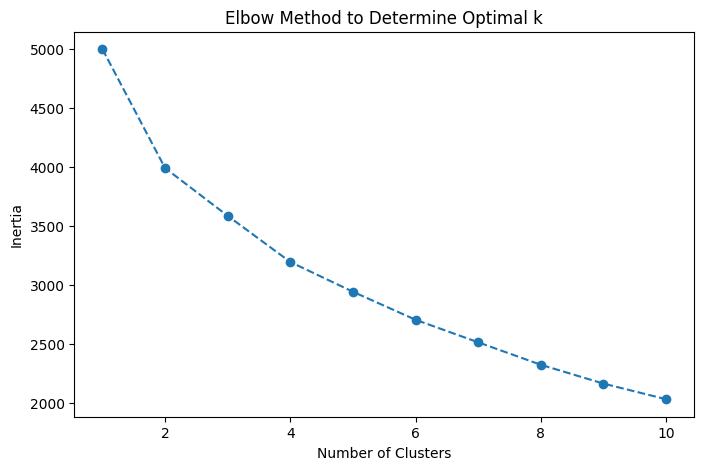

In [11]:
# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.show()

In [12]:
# Apply K-means clustering with the optimal k (assuming k=5 based on the elbow method)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [13]:
# Print the first few rows of the clustered dataset
print("Clustered Dataset Preview:")
print(df.head())

Clustered Dataset Preview:
   Customer ID  Gender  Age  Annual Income  Spending Score  \
0         1001       1   34          32674               5   
1         1002       0   26          98560              65   
2         1003       1   50          38874              13   
3         1004       1   37          58642              85   
4         1005       1   30         112820              90   

   Purchase Frequency  Cluster  
0                  18        0  
1                  28        1  
2                  35        0  
3                  43        2  
4                  47        4  


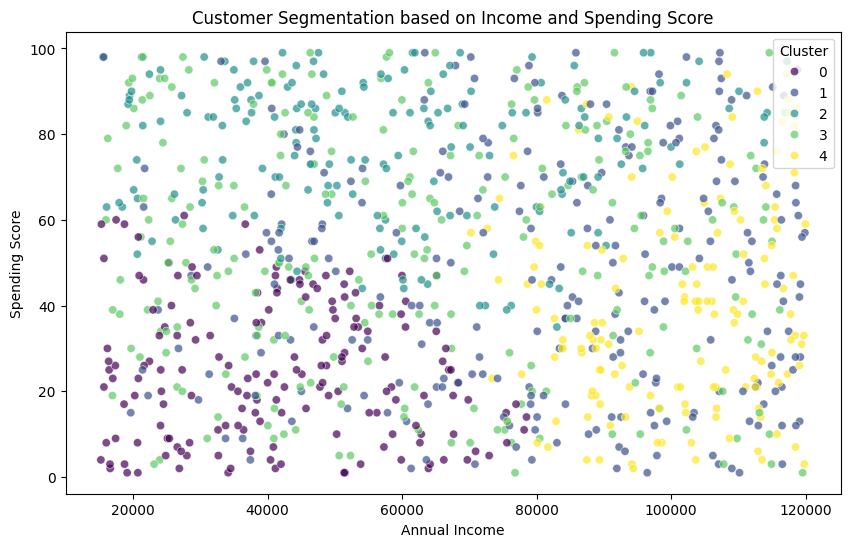

In [14]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=df['Annual Income'],
    y=df['Spending Score'],
    hue=df['Cluster'],
    palette='viridis',
    alpha=0.7
)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation based on Income and Spending Score')
plt.legend(title='Cluster')
plt.show()

In [15]:
# Save the clustered data
df.to_csv("clustered_customers.csv", index=False)